In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

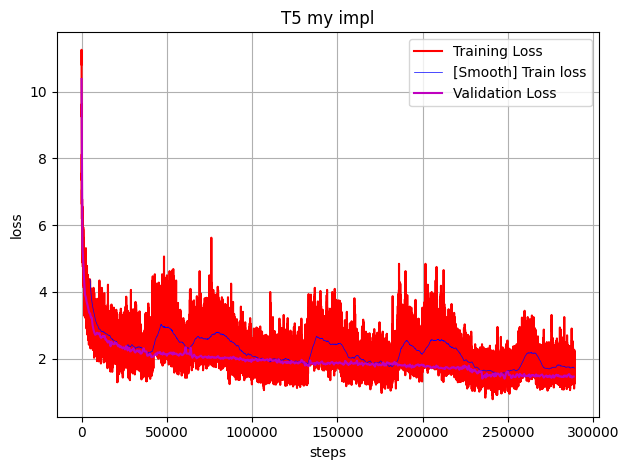

In [27]:
train_log1 = pd.read_csv('./output_history/t5_train_log_30072025.csv')
val_log1 = pd.read_csv('./output_history/t5_val_log_30072025.csv')
show_val_loss = True

# Apply a moving average
window_size = 5000
smoothed_loss = np.convolve(train_log1['loss'], np.ones(window_size)/window_size, mode='valid')

plt.plot(train_log1['step'], train_log1['loss'], 'r', label='Training Loss')
plt.plot(train_log1['step'][window_size-1:], smoothed_loss, 'b', label='[Smooth] Train loss', linewidth=0.5)
if show_val_loss:
    plt.plot(val_log1['step'], val_log1['val_loss'], 'm', label='Validation Loss')

plt.xlabel('steps')
plt.ylabel('loss')
plt.title('T5 my impl')
plt.grid(True)
plt.legend()

plt.savefig('t5_sample_plot_loss.png', dpi=300, bbox_inches='tight')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()

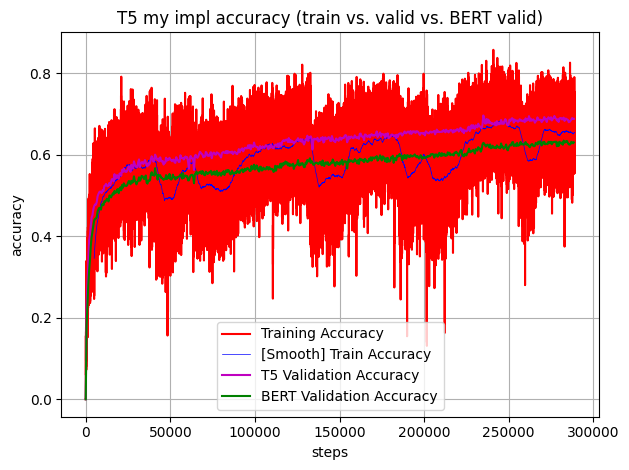

In [28]:
# =========== ACCURACY


train_log1 = pd.read_csv('./output_history/t5_train_log_30072025.csv')
val_log1 = pd.read_csv('./output_history/t5_val_log_30072025.csv')

val_log2 = pd.read_csv('../bert/output_history/bert_val_log_14072025.csv')


show_val_loss = True

# Apply a moving average
window_size = 5000
smoothed_loss = np.convolve(train_log1['accuracy'], np.ones(window_size)/window_size, mode='valid')
# print(len(smoothed_loss))
# print(len(train_log1['loss'])) #step,accuracy,loss,lr

plt.plot(train_log1['step'], train_log1['accuracy'], 'r', label='Training Accuracy')
plt.plot(train_log1['step'][window_size-1:], smoothed_loss, 'b', label='[Smooth] Train Accuracy', linewidth=0.5)

plt.plot(val_log1['step'], val_log1['val_acc'], 'm', label='T5 Validation Accuracy')
plt.plot(val_log2['step'], val_log2['val_acc'], 'g', label='BERT Validation Accuracy')

plt.xlabel('steps')
plt.ylabel('accuracy')
plt.title('T5 my impl accuracy (train vs. valid vs. BERT valid)')
plt.grid(True)
plt.legend()

plt.savefig('t5_sample_plot_acc.png', dpi=300, bbox_inches='tight')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plots
plt.show()